In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [37]:
from diffprivlib.models import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

C:\Users\Anupama\anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:99: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0)]),
           bounds=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])))

In [53]:
from numpy import array
from numpy import inf
from numpy.linalg import norm
import numpy as np
d=np.asarray(dataset.data)
for i in range (0,d.shape[0]):
    l2=norm(d[i,:],inf)
    print(d[i,:])
    print(l2)
    print("\n")



[5.1 3.5 1.4 0.2]
5.1


[4.9 3.  1.4 0.2]
4.9


[4.7 3.2 1.3 0.2]
4.7


[4.6 3.1 1.5 0.2]
4.6


[5.  3.6 1.4 0.2]
5.0


[5.4 3.9 1.7 0.4]
5.4


[4.6 3.4 1.4 0.3]
4.6


[5.  3.4 1.5 0.2]
5.0


[4.4 2.9 1.4 0.2]
4.4


[4.9 3.1 1.5 0.1]
4.9


[5.4 3.7 1.5 0.2]
5.4


[4.8 3.4 1.6 0.2]
4.8


[4.8 3.  1.4 0.1]
4.8


[4.3 3.  1.1 0.1]
4.3


[5.8 4.  1.2 0.2]
5.8


[5.7 4.4 1.5 0.4]
5.7


[5.4 3.9 1.3 0.4]
5.4


[5.1 3.5 1.4 0.3]
5.1


[5.7 3.8 1.7 0.3]
5.7


[5.1 3.8 1.5 0.3]
5.1


[5.4 3.4 1.7 0.2]
5.4


[5.1 3.7 1.5 0.4]
5.1


[4.6 3.6 1.  0.2]
4.6


[5.1 3.3 1.7 0.5]
5.1


[4.8 3.4 1.9 0.2]
4.8


[5.  3.  1.6 0.2]
5.0


[5.  3.4 1.6 0.4]
5.0


[5.2 3.5 1.5 0.2]
5.2


[5.2 3.4 1.4 0.2]
5.2


[4.7 3.2 1.6 0.2]
4.7


[4.8 3.1 1.6 0.2]
4.8


[5.4 3.4 1.5 0.4]
5.4


[5.2 4.1 1.5 0.1]
5.2


[5.5 4.2 1.4 0.2]
5.5


[4.9 3.1 1.5 0.2]
4.9


[5.  3.2 1.2 0.2]
5.0


[5.5 3.5 1.3 0.2]
5.5


[4.9 3.6 1.4 0.1]
4.9


[4.4 3.  1.3 0.2]
4.4


[5.1 3.4 1.5 0.2]
5.1


[5.  3.5 1.3 0.3]
5.0


[4.5 2.3 1.3 0.3

In [50]:
d.shape

(150, 4)

In [39]:
clf.predict(X_test)

array([1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       2, 2, 1, 1, 2, 0, 0, 0])

In [40]:
print("Test accuracy: %f"%(clf.score(X_test, y_test)*100))

Test accuracy: 73.333333


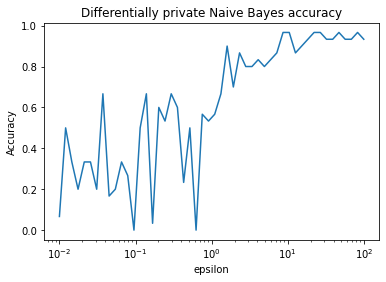

In [41]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
bounds = ([4.3, 2.0, 1.1, 0.1], [7.9, 4.4, 6.9, 2.5])
accuracy = list()

for epsilon in epsilons:
    clf = GaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()